# Введение в TensorFlow

![](https://lh3.googleusercontent.com/I1Dpp7I9RZIGl0rVMlPfnhfl-bkl_2uDHZwVC87BWmqtPaAs1irMWOdJxTmTEQJB-VGfLryCyHxqvyNchVIVLL-vqGrF3Q=s688)

До сегодняшнего дня мы собирали различные довольно простые модели в высокоуровневом API для [tensorflow](https://www.tensorflow.org) под названием Keras. Сегодня, наконец, пришло время поиграться с голым ~~королём~~ функционалом библиотеки и посмотреть, как в нём собираются и обучаются самые простые модели. 

In [1]:
import numpy as np

In [3]:
import tensorflow as tf
tf.__version__  # ОУУУУ ЩИИИИТ, ВТОРАЯ БЭТА-ВЕРСИЯ!!! АААААААААААА

'2.0.0-beta1'

# 0. Tensoflow teaser

Давайте реализуем на `numpy` и на `tensorflow` функцию для поиска суммы квадратов первых $N$ чисел и посмотрим насколько быстро эти функции работают.

In [4]:
def np_sum_squares(N):
    return np.sum(np.arange(N)**2)

In [5]:
%%timeit
N = 10**8
np_sum_squares(N)

1.2 s ± 41.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Tensorflow из-за того, что мы сначала задаём структуру вычислений, а после осуществляем их, работает быстрее.

In [8]:
def tf_sum_squares(N):
    N = tf.constant(N, dtype='int64')
    return tf.reduce_sum((tf.range(N)**2))

In [9]:
%%timeit
N = 10**8
tf_sum_squares(N)

762 ms ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Более того, когда вы уже задали свой граф вычислений и убедились, что всё работает, можно вызвать декоратор `@tf.function`. Он сделает работу заданного графа более оптимальной и ещё сильнее ускорит код. Обычно этот декоратор используют для оптимизации циклов и условий под графовую структуру. Но про это позже :) 

In [6]:
@tf.function
def tf_sum_squares(N):
    N = tf.constant(N, dtype='int64')
    return tf.reduce_sum((tf.range(N)**2))

In [7]:
%%timeit
N = 10**8
tf_sum_squares(N)

250 µs ± 48.6 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Если сравнивать время, то мы видим значительный прогресс в скорости вычислений даже для простой задачи. Данный прирост будет значительно большим для сложных и тяжелых по памяти рассчетов.

# 1. Тензоры и базовые операции над ними

Основной объект в tensorflow - это **тензор.** Или многомерный массив чисел. Чтобы не нужно было учить кучу новых команд, tensorflow косплеит numpy. 

```
    np.zeros -> tf.zeros
    np.sin -> tf.sin
    np.mean -> tf.reduce_mean
    np.arange -> tf.range
    np.cumsum -> tf.cumsum
```

In [18]:
# можно задать тензор из нулей
tf.zeros([3, 4])

<tf.Tensor: id=105, shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [19]:
# или из единиц, но уже более сложной размерности
tf.ones([3, 4, 2])

<tf.Tensor: id=109, shape=(3, 4, 2), dtype=float32, numpy=
array([[[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]], dtype=float32)>

In [27]:
# можно сгенерировать тензор из нормального распределения
tf.random.normal([2,2])

<tf.Tensor: id=132, shape=(2, 2), dtype=float32, numpy=
array([[ 0.4270771 ,  0.6621061 ],
       [-0.06865419, -0.49370536]], dtype=float32)>

In [21]:
# можно просто сделать залифку тензора какими-то числами
tf.fill([2, 2], 0.5)

<tf.Tensor: id=120, shape=(2, 2), dtype=float32, numpy=
array([[0.5, 0.5],
       [0.5, 0.5]], dtype=float32)>

In [22]:
# можно создать матрицу в numpy
x = np.array([[1, 2, 3, 4],
              [4, 3, 2, 1]])
x

array([[1, 2, 3, 4],
       [4, 3, 2, 1]])

In [23]:
# а потом перевести её в тензор
tf.convert_to_tensor(x, tf.float32) 

<tf.Tensor: id=122, shape=(2, 4), dtype=float32, numpy=
array([[1., 2., 3., 4.],
       [4., 3., 2., 1.]], dtype=float32)>

In [24]:
# или можно просто сразу создать тензор 
tf.constant([[1,  2,  3,  4],
             [5,  6,  7,  8],
             [9, 10, 11, 12]])

<tf.Tensor: id=124, shape=(3, 4), dtype=int32, numpy=
array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]], dtype=int32)>

In [28]:
# наверное, стоит уточнить тип данных в тензоре
x = tf.constant([[1,  2,  3,  4],
                 [5,  6,  7,  8],
                 [9, 10, 11, 12]], dtype=tf.float32)

Все срезы, операции, размерности работают как в numpy.

In [29]:
x.dtype

tf.float32

In [30]:
x.shape

TensorShape([3, 4])

In [31]:
x[0]

<tf.Tensor: id=138, shape=(4,), dtype=float32, numpy=array([1., 2., 3., 4.], dtype=float32)>

In [32]:
x[:,1]

<tf.Tensor: id=143, shape=(3,), dtype=float32, numpy=array([ 2.,  6., 10.], dtype=float32)>

In [33]:
x + 10

<tf.Tensor: id=146, shape=(3, 4), dtype=float32, numpy=
array([[11., 12., 13., 14.],
       [15., 16., 17., 18.],
       [19., 20., 21., 22.]], dtype=float32)>

In [35]:
x[x > 3]

<tf.Tensor: id=206, shape=(9,), dtype=float32, numpy=array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.], dtype=float32)>

In [36]:
y = tf.constant([[12, 11, 10, 9],
                  [8, 7, 6, 5],
                  [4, 3, 2, 1]], dtype=tf.float32)

In [37]:
x + y

<tf.Tensor: id=209, shape=(3, 4), dtype=float32, numpy=
array([[13., 13., 13., 13.],
       [13., 13., 13., 13.],
       [13., 13., 13., 13.]], dtype=float32)>

In [38]:
x**y

<tf.Tensor: id=211, shape=(3, 4), dtype=float32, numpy=
array([[1.00000e+00, 2.04800e+03, 5.90490e+04, 2.62144e+05],
       [3.90625e+05, 2.79936e+05, 1.17649e+05, 3.27680e+04],
       [6.56100e+03, 1.00000e+03, 1.21000e+02, 1.20000e+01]],
      dtype=float32)>

In [39]:
tf.math.exp(x)

<tf.Tensor: id=213, shape=(3, 4), dtype=float32, numpy=
array([[2.7182817e+00, 7.3890562e+00, 2.0085537e+01, 5.4598152e+01],
       [1.4841316e+02, 4.0342880e+02, 1.0966332e+03, 2.9809580e+03],
       [8.1030840e+03, 2.2026465e+04, 5.9874141e+04, 1.6275480e+05]],
      dtype=float32)>

In [40]:
# Когда надоело работать с тензором, можно вернуться назад в numpy формат
x.numpy() 

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]], dtype=float32)

In [54]:
# тип у тензоров может быть разный, но всегда один
tf.constant("hello world")

<tf.Tensor: id=283, shape=(), dtype=string, numpy=b'hello world'>

### Задание 1:

Попробуйте реализовать на tensorflow сигмоиду. 

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

In [45]:
## Ответ: 
x = tf.linspace(-1.,1.,10)
sigma = 1 / (1 + tf.exp(-x))
sigma

<tf.Tensor: id=243, shape=(10,), dtype=float32, numpy=
array([0.26894143, 0.314799  , 0.36457646, 0.41742983, 0.4722508 ,
       0.52774924, 0.5825702 , 0.6354236 , 0.685201  , 0.7310586 ],
      dtype=float32)>

### Задание 2:

Попробуйте реализовать на tensorflow среднюю квадратичную ошибку. 

$$ 
MSE(\hat y, y) = \sum_{i=1}^n (\hat y - y)^2
$$

In [50]:
## Ответ: 
y_true = tf.constant([1,2,3,4,5])
y_predicted = tf.constant([5,4,3,2,1])

mse = tf.reduce_mean((y_true - y_predicted)**2)
mse

<tf.Tensor: id=269, shape=(), dtype=int32, numpy=8>

------------------------------------------

# 2. Переменные

Следущий важный объект в tensorflow это **переменная.** Она представляет из себя некоторый буфер в памяти, который содержит текущие тензоры. 

* Переменную можно вставить в любое место графа 
* Переменные можно использовать, чтобы описать какую-то трансформацию
* В процессе расчётов их можно изменять
* Обычно их исползуют для описания параметров модели

In [79]:
w = tf.Variable(initial_value=0.5)
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5>

In [80]:
x = np.array([1,2,3], dtype=float)
x

array([1., 2., 3.])

In [81]:
x*w

<tf.Tensor: id=369, shape=(3,), dtype=float32, numpy=array([0.5, 1. , 1.5], dtype=float32)>

# 3. Производные да градиенты

Тензорфлоу может вычислять производные и градиенты автоматически. Градиенты вычисляютя по цепному правилу: 

$$ {\partial f(g(x)) \over \partial x} = {\partial f(g(x)) \over \partial g(x)}\cdot {\partial g(x) \over \partial x} $$

Пакет может получить производную любого графа, заданного в нём.

In [109]:
x = tf.constant([0.3, 1])

# опция persistent=True позволяет искать производную много раз, а не один
with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = y**2

In [110]:
t.gradient(z, x)

<tf.Tensor: id=665, shape=(2,), dtype=float32, numpy=array([2.6, 2.6], dtype=float32)>

In [111]:
t.gradient(z, y)

<tf.Tensor: id=678, shape=(), dtype=float32, numpy=2.6>

Нарисуем функцию и её производную на картинке :) 

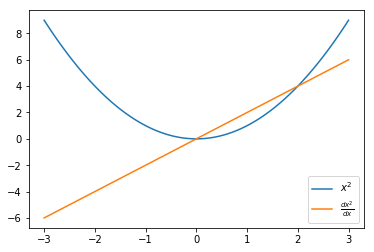

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

x = tf.linspace(-3., 3., 100)

with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = x**2

dy_dx = t.gradient(y, x)

plt.plot(x, y, label="$x^2$")
plt.plot(x, dy_dx, label=r"$\frac{dx^2}{dx}$")
plt.legend();

### Задание 3:

Реализуйте расчёт градиента для функции 

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7) 
$$

в точке `w = [[5,10], [1,2]]`

In [342]:
# Ответ: 
#w = tf.constant([[5,10], [1,2]], dtype=tf.float32)
w = tf.Variable(initial_value=[[5,10], [1,2]], dtype=tf.float32)

with tf.GradientTape( ) as t:
#    t.watch(w) # если работаем с variable, то можно не указывать по какой переменной производная 
    f = tf.reduce_prod(tf.math.log(tf.math.log(w + 7)))

df_dw = t.gradient(f, w)
df_dw.numpy()

array([[0.0201272 , 0.01089125],
       [0.04485611, 0.03509369]], dtype=float32)

------------------------------------------

# 4. Оптимизация

Итак, tf умеет искать производные, осталось научиться применять его для оптимизации. 

Попробуем решить глупую задачку по конвертации градусов по цельсию в градусы по фаренгейту. По данным будем пытаться восстановить формулу: 

$$ f = c \times 1.8 + 32 $$

In [396]:
celsius    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype='float32')
fahrenheit = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype='float32')

for i,c in enumerate(celsius):
    print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [274]:
# параметры модели 
a = tf.Variable(tf.random.normal([1]), name='bias')
b = tf.Variable(tf.random.normal([1]), name='k')

a.numpy(), b.numpy()

(array([0.08488563], dtype=float32), array([0.84090513], dtype=float32))

In [275]:
# Наша модель
def linear_regression(x):
    return a + b*x

# Ошибка для модели
def mean_square(y_pred, y_true):
    return tf.reduce_mean((y_pred-y_true)**2)

In [276]:
linear_regression(celsius).numpy()

array([-33.55132   ,  -8.324165  ,   0.08488563,   6.8121266 ,
        12.6984625 ,  18.584799  ,  32.03928   ], dtype=float32)

In [277]:
mean_square(linear_regression(celsius), fahrenheit).numpy()

1815.6991

In [278]:
# оптимизатор 
optimizer = tf.optimizers.SGD(learning_rate=0.001)

# процесс оптимизации
def model_train(X, Y):

    # Указываем нашему дифириенцированию за какими переменными следить 
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Вычисляем градиенты
    gradients = g.gradient(loss, [a, b])
    
    # Обновляем веса a и b в ходе одной итерации спуска 
    optimizer.apply_gradients(zip(gradients, [a, b]))
    pass

In [271]:
# Обучение
epochs = 2000 # число эпох 

for i in range(epochs):
    
    # Делаем щаг градиентного спуска 
    model_train(celsius, fahrenheit)
    
    # Каждую сотую итерацию следим за тем, что произошло
    if i%100 == 0:
        y_pred = linear_regression(celsius)
        loss_val = mean_square(y_pred, fahrenheit)
        print("step: %i, loss: %f, a: %f, b: %f" % (i, loss_val, a.numpy(), b.numpy()))


step: 0, loss: 1064.964722, a: -0.203074, b: 2.427525
step: 100, loss: 676.188660, a: 5.417834, b: 2.021883
step: 200, loss: 460.383881, a: 10.058247, b: 1.982721
step: 300, loss: 313.459412, a: 13.887136, b: 1.950408
step: 400, loss: 213.429886, a: 17.046432, b: 1.923746
step: 500, loss: 145.327728, a: 19.653225, b: 1.901747
step: 600, loss: 98.962509, a: 21.804132, b: 1.883594
step: 700, loss: 67.396004, a: 23.578888, b: 1.868617
step: 800, loss: 45.904911, a: 25.043266, b: 1.856258
step: 900, loss: 31.273136, a: 26.251568, b: 1.846061
step: 1000, loss: 21.311594, a: 27.248550, b: 1.837647
step: 1100, loss: 14.529543, a: 28.071182, b: 1.830705
step: 1200, loss: 9.912112, a: 28.749960, b: 1.824977
step: 1300, loss: 6.768514, a: 29.310026, b: 1.820250
step: 1400, loss: 4.628249, a: 29.772154, b: 1.816350
step: 1500, loss: 3.171155, a: 30.153454, b: 1.813132
step: 1600, loss: 2.179128, a: 30.468073, b: 1.810477
step: 1700, loss: 1.503719, a: 30.727674, b: 1.808286
step: 1800, loss: 1.04

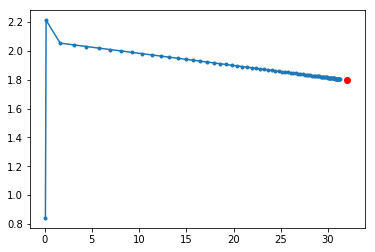

In [279]:
from IPython.display import clear_output

epochs = 2000 # число эпох 

ass = [a.numpy()[0]] # стартовые точки 
bss = [b.numpy()[0]] 

for i in range(epochs):
    # Делаем щаг градиентного спуска 
    model_train(celsius, fahrenheit)
    
    if i%25 == 0:
        # Пополняем запас точек 
        ass.append(a.numpy()[0])
        bss.append(b.numpy()[0])

        clear_output(True) # чтобы всё на одной картинке рисовалось, а не на милионе
        plt.plot(ass, bss, marker='.')
        plt.scatter(32, 1.8, c='red')
        plt.show()

### Задание 4:

Реализуйте для функции 

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7) 
$$

процедуру градиентного спуска. Каким получилось минимальное значение? 

In [346]:
#Ответ:
w = tf.Variable(initial_value=tf.random.normal([2,2]))
v = tf.Variable(initial_value=tf.random.normal([2,2])) # добавили, чтобы проиллюстрировать комент про матричное диф

# оптимизатор 
optimizer = tf.optimizers.SGD(learning_rate=0.001)

def find_min():
    # градиент 
    with tf.GradientTape( ) as t:
        f = tf.reduce_prod(tf.math.log(tf.math.log(w + 7)) + v)
        
    # Вычисляем градиенты
    gradients = t.gradient(f, [w, v]) # СПИСОК МАТРИЦ, у нас тут матричное диффириенцирование
    
    print(gradients, '\n') # на них даже можно посмотреть :) 
    optimizer.apply_gradients(zip(gradients, [w, v]))
    pass

find_min()

[<tf.Tensor: id=2641565, shape=(2, 2), dtype=float32, numpy=
array([[ 0.07228665, -0.06846854],
       [-0.08660195, -0.3811529 ]], dtype=float32)>, <tf.Tensor: id=2641561, shape=(2, 2), dtype=float32, numpy=
array([[ 0.8021357, -1.0267773],
       [-0.9365754, -4.1293297]], dtype=float32)>] 



In [356]:
w = tf.Variable(initial_value=[[5., 10.], [1., 2.]])

# оптимизатор 
optimizer = tf.optimizers.SGD(learning_rate=1e-3)

def find_min():
    # градиент 
    with tf.GradientTape( ) as t:
        f = tf.reduce_prod(tf.math.log(tf.math.log(w + 7)) + v)
        
    # Вычисляем градиенты
    gradients = t.gradient(f, [w]) # СПИСОК МАТРИЦ, у нас тут матричное диффириенцирование
    
    optimizer.apply_gradients(zip(gradients, [w]))
    pass


for i in range(500):
    find_min()
    if i % 100 == 0:
        print(w.numpy(), '\n')

[[ 4.9999423 10.0000305]
 [ 1.0000912  2.0002346]] 

[[ 4.9941726 10.003082 ]
 [ 1.0092107  2.0236657]] 

[[ 4.988403  10.006134 ]
 [ 1.0183371  2.0470202]] 

[[ 4.982594  10.009186 ]
 [ 1.0274686  2.0702987]] 

[[ 4.9767766 10.012238 ]
 [ 1.036602   2.093502 ]] 



------------------------------------------

Можно попробовать поразвлекаться с разными методами оптимизации! 

* На вход модели при обучении мы сейчас подавали нумпаевские вектора. В будущем мы будем смотреть и на разные другие способы скармливать модели данные.
* Такие циклы обучения обычно пишут для сложных моделей, которые выходят в плане своей сложности за рамки модуя `keras`. Мы периодически будем это делать. 


# 5. Свой собственный слой

Новые слои можно писать на основе керасовского класса `Layer`. Если прописать `help(tf.keras.layers.Layer)`, можно почитать про него. Если в кратце, нужно реализовать две части: 

* Конструктор, в нём мы описываем гиперпараметры 
* Метод `build`, в которм мы описываем все переменные 
* Метод `call`, который делает forward pass

In [428]:
class MyLinear(Layer):
    
    # Задаём консруктор 
    def __init__(self, units=32):
        super(MyLinear, self).__init__()  # чтобы коректно унаследовались методы
        self.units = units              # число нейронов

    def build(self, input_shape):
        # add_weight внутри build то же самое что и Variable, но совместимо с Keras
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal', trainable=True)
        
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='random_normal', trainable=True)

    # Применение 
    def call(self, inputs):
        # сразу делаем и линейное преобразование и ReLU (а почему бы и нет)
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b) 

In [429]:
# транспонировали выборку
x_train = celsius[:,None]
y_train = fahrenheit[:,None]

In [430]:
from tensorflow.keras import Sequential

model = Sequential()
model.add(MyLinear(32))  # добавили свой слой! 
model.add(Dense(1))

opt = tf.keras.optimizers.Adam( )

model.compile(loss='mse', optimizer=opt)

In [431]:
model.fit(x_train, y_train, validation_split=0.2, epochs=2, verbose=1)

Train on 5 samples, validate on 2 samples
Epoch 1/2
5/5 [==============================] - 0s 17ms/sample - loss: 1693.0818 - val_loss: 7472.9443
Epoch 2/2
5/5 [==============================] - 0s 536us/sample - loss: 1688.6133 - val_loss: 7449.4175


По аналогии с помощью класса `Model` можно создавать свои модели. Этим мы тоже будем позже заниматься. Почитать про свои слои и модели можно подробнее [вот тут, в документации.](https://www.tensorflow.org/beta/guide/keras/custom_layers_and_models)

- Про видео-карты ? 

# N+1. Как Tensorflow работал раньше 

Больше такой код не надо писать никогда и нигде. Если видите его в туториалах в интернете, сразу закрывайте их. Эти туториалы устарели. Можете попробовать подуть на них (сдуть слой пыли), а дальше попробовать самостоятельно переписать старый код на новый. Это неплохое упражнение :) 

In [ ]:
import tensorflow.compat.v1 as tf  # подгружаем первую версию библиотеки 
tf.disable_v2_behavior()           # отключаем функционал второй 
                                   # теперь код, написанный на версии tf 1.x должен работать 
tf.__version__

Раньше сначала надо было задать структуру вычислений с помощью тензоров. 

In [ ]:
# что происходило в первой версии 
a = tf.constant([1, 2])
b = tf.constant([3, 4])

print(a + b)

Результат на лету было увидеть нельзя. 

In [ ]:
c = a + b
с

Если хотелось результата, надо было запускать вычислительную сессию, которая прогоняла все данные через граф.

In [ ]:
# открываем вычислительную сессию 
with tf.Session() as sess:
    print(sess.run(с))

In [ ]:
# либо можно было открыть глобальную сессию 
sess = tf.InteractiveSession()
c.eval()

Процедура обучения модели выглядела раньше иначе. Кроме переменных в обучении участие принимал ещё один объект, `placeholder`. 

* __placeholder__ — место в графе, которое может принимать входные параметры в граф извне. В эти места мы будем вставлять наши данные

In [ ]:
epochs = 10

# плейсхолдеры для данных 
# "Я обещаю вставить сюда x и y позже"
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# параметры модели 
a = tf.Variable(tf.zeros([1]), name='bias')
b = tf.Variable(tf.zeros([1]), name='k')

# модель 
y_hat = b*x + a

# функция потерь и метод оптимизации
loss = tf.sqrt(tf.reduce_sum((y - y_hat)**2))
opt = tf.train.AdamOptimizer(learning_rate = 0.1)

# из-за того, что не было динамических вычислений, 
# было проще с градиентами
step = opt.minimize(loss)

# Но зато было сложнее с процедурой обучения, надо было запускать ... сессии
# открываем вычислительную сессию 
with tf.Session() as sess:
    
    # инициализировали все переменные 
    tf.global_variables_initializer().run() 
    
    for i in range(epochs):
        
        # Дорогая сессия, вычисли мне результат функции потерь, пожалуйста! Вот тебе конкретные x и y! 
        cur_loss = sess.run(loss, feed_dict={x:celsius, y:fahrenheit})
        print('Текущие потери:', cur_loss)
        
        # шаг оптимизации 
        sess.run(step, feed_dict={x:celsius, y:fahrenheit})
        
    print('\nКоэффициенты:', a.eval()[0], b.eval()[0])
    print('Прогнозы:', sess.run(y_hat, feed_dict={x:[-40,0,38]}))

## Почиташки

* [Туториал с Хабра.](https://habrahabr.ru/company/ods/blog/324898/) Из него я украл начало этой тетрадки.
* [Туториал из ШАДовского курса.](https://nbviewer.jupyter.org/github/yandexdataschool/Practical_DL/blob/fall18/week02_autodiff/seminar_tensorflow.ipynb) Он же туториал из AML курса и из кучи других курсов. Из него я тоже много воровал для первой части тетрадки. Даже больше, чем с Хабра. Не подавайте на меня в суд. Я блюду авторское право. 